In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb

In [ ]:
# Load the Data
(train_data,train_labels),(test_data,test_labels)=imdb.load_data(num_words=10000)

In [ ]:
import numpy as np
def vectorize_sequences(sequences,dimensions=10000):
  results = np.zeros((len(sequences),dimensions))
  for i,sequence in enumerate(sequences):
    results[i,sequence] = i
  return results

In [ ]:
# Vectorize training data
X_train = vectorize_sequences(train_data)

In [ ]:
# Vectorize Testing Data
X_test = vectorize_sequences(test_data)
X_train.shape

(25000, 10000)

In [ ]:
Y_train= np.asarray(train_labels).astype('float32')
Y_test= np.asarray(test_labels).astype('float32')

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

model=models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                160016    
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160305 (626.19 KB)
Trainable params: 160305 (626.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),loss=losses.binary_crossentropy,metrics=[metrics.binary_accuracy])

In [ ]:
X_val = X_train[:10000]
partial_X_train=X_train[10000:]

Y_val = Y_train[:10000]
partial_Y_train=Y_train[10000:]

In [ ]:
history = model.fit(partial_X_train, partial_Y_train, epochs= 20, batch_size= 512, validation_data= (X_val,Y_val))

Epoch 1/20
30/30 [==============================] - 3s 71ms/step - loss: 145.7174 - binary_accuracy: 0.5184 - val_loss: 1.6885 - val_binary_accuracy: 0.4699
Epoch 2/20
30/30 [==============================] - 1s 44ms/step - loss: 1.6698 - binary_accuracy: 0.5521 - val_loss: 1.0655 - val_binary_accuracy: 0.5694
Epoch 3/20
30/30 [==============================] - 2s 58ms/step - loss: 0.7651 - binary_accuracy: 0.5805 - val_loss: 0.9681 - val_binary_accuracy: 0.5042
Epoch 4/20
30/30 [==============================] - 2s 53ms/step - loss: 0.6805 - binary_accuracy: 0.5761 - val_loss: 0.8780 - val_binary_accuracy: 0.5357
Epoch 5/20
30/30 [==============================] - 1s 35ms/step - loss: 0.6544 - binary_accuracy: 0.6039 - val_loss: 0.9018 - val_binary_accuracy: 0.6995
Epoch 6/20
30/30 [==============================] - 1s 34ms/step - loss: 0.6693 - binary_accuracy: 0.5747 - val_loss: 0.8256 - val_binary_accuracy: 0.6597
Epoch 7/20
30/30 [==============================] - 1s 34ms/step - l

In [ ]:
test_loss,test_acc=model.evaluate(X_test,Y_test)
print(f' test accuracy:{test_acc}')

782/782 [==============================] - 3s 4ms/step - loss: 1.8313 - binary_accuracy: 0.7660
 test accuracy:0.765999972820282


In [ ]:
train_loss,train_acc=model.evaluate(X_train,Y_train)
print(f' train accuracy:{train_acc}')

782/782 [==============================] - 3s 4ms/step - loss: 0.5539 - binary_accuracy: 0.8269
 train accuracy:0.8268799781799316


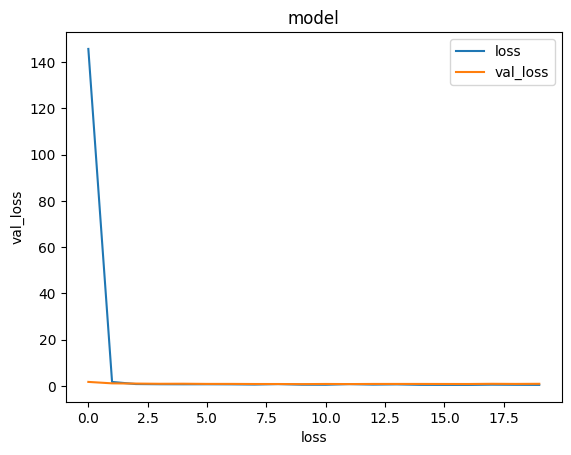

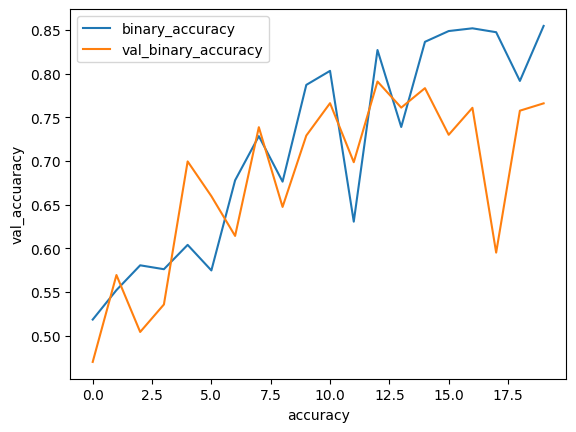

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
history_df=pd.DataFrame(history.history)
history_df.loc[:,['loss','val_loss']].plot()
plt.title('model')
plt.xlabel('loss')
plt.ylabel('val_loss')
history_df.loc[:,['binary_accuracy','val_binary_accuracy']].plot()
plt.xlabel('accuracy')
plt.ylabel('val_accuaracy')
plt.show()